
# Lesson 4 - matrices part 1

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz

In [1]:
# NOTE: these lines define global figure properties used for publication.
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

AttributeError: module 'IPython.display' has no attribute 'set_matplotlib_formats'

# Creating matrices

To create matrices we can use the numpy library \
Note: np.array2string is just a function to "pretty print" to includee a prefix like A =...  - you can also just use print(A) without a prefix
(try to see the difference)

In [ ]:
A = np.array([[2,3,4],[1,2,4]]) # a 2x3 matrix (2 rows, 3 columns)
B = np.array([[0,3,1],[-1,-4,2], [ 1,3,4],[ 3,4,6]]) # a 4x3 matrix (4 rows, 3 columns)
print("A = ",np.array2string(A,prefix = "A =  "))
print() # line seperator
print("B = ",np.array2string(B,prefix = "B =  "))
print()
print("number of rows in A:")
print(A.shape[0])
print("number of columns in A:")

print(A.shape[1])

A =  [[2 3 4]
      [1 2 4]]

B =  [[ 0  3  1]
      [-1 -4  2]
      [ 1  3  4]
      [ 3  4  6]]

number of rows in A:
2
number of columns in A:
3


# Broadcasting

Brodcasting is a way to repeat operations. It's not really a math operation, but a python operation. So where we add the row vector to every column. Since it's a 3x1 vector (3 rows, 1 column) and a 1x2 vector the result is a 3x2 vector (3 rows and 2 columns)

In [ ]:
v = np.array([[1,2,3]]).T # column vector
w = np.array([[10,20]])   # row vector
v + w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Visualizing matrices as images

A matrix:
[[ 0.59963295 -1.04822292 -0.43536048 -0.49298306]
 [-1.02323668 -0.4825025   0.14744484 -0.39963037]
 [-0.75437324 -0.98417668  0.18767109 -1.29993718]]


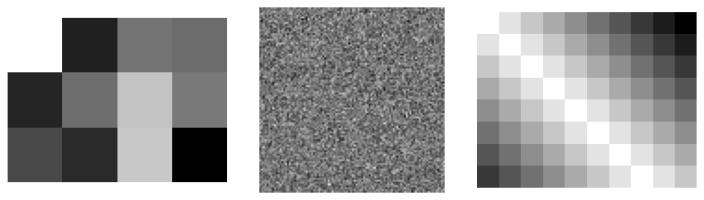

In [ ]:
# create some matrices
A = np.random.randn(3,4) # creates a 3 x 4 matrix with random numbers
print("A matrix:")
print(A)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10)) # 8 x 10 matrice (note diagonals are constants in all diagonals)


# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3)) # 3 plots in 1 row

axs[0].imshow(A,cmap='gray')
# using a gray scale - low numbers towards black, high numbers toward white
# will be scaled according to the input
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off') # turn of x,y axis
plt.tight_layout() # minimal padding
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

# Slicing out rows and columns

In [ ]:
# create a matrix
# arange doc : https://numpy.org/doc/stable/reference/generated/numpy.arange.html
A = np.reshape(np.arange(1,10),(3,3)) # creates a 3 x 3 matrix
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# get the n-th row - note row numbers start with 0, so 1 corresponds to the 2nd
# row

print("First row (0):")
print( A[0,:] )

# note that to extract only one row, you don't need the column indices.
print("second row (1):")

print( A[1] )
# But that's potentially confusing, so better to use the first notation

# getting a single element - row 1, column 2 (starting from 0) - should be 6
print("Getting a single element:")
print( A[1,2] )


First row (0):
[1 2 3]
second row (1):
[4 5 6]
Getting a single element:
6


In [ ]:
# get the n-th column
print( A[:,1] )
# Note that it prints out as a "row" even it's a column of the matrix


[2 5 8]


In [ ]:
# multiple rows - rows starting from 0 and then up til 2, but not including
A[0:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# multiple columns
A[:,1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [ ]:
# This cell has the example shown in the book.

# the full matrix
A = np.arange(60).reshape(6,10) # 6 rows, 10 columns

# a block of it - taking rows 1-3, and column 1-4  (remember - excluding the last index)
sub = A[1:4,1:5]


# print them out
print('Original matrix:\n')
print(A)

print('\n\nSubmatrix:\n')
print(sub)


Original matrix:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


Submatrix:

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]


# Some special matrices

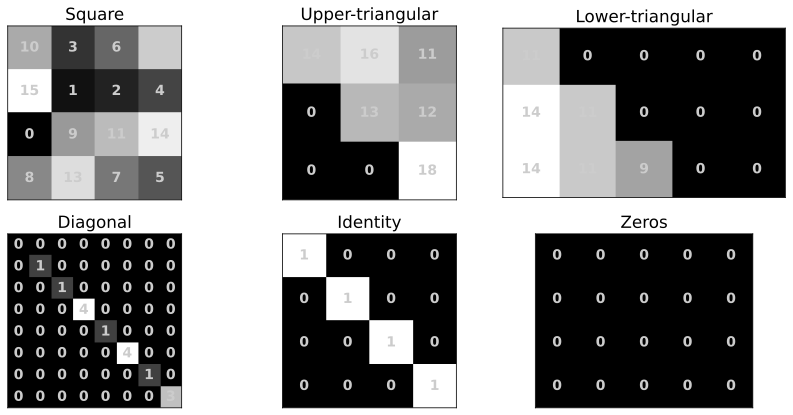

In [ ]:
## create some matrices

# square - permutation of numbers 0 to 15
M1 = np.random.permutation(16).reshape(4,4) # 4 x 4 matrix

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3))) # triu = triangle uppper

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5))) # tril = triangler lower

# diagonal
M4 = np.diag( np.random.randint(0,6,size=8) )  # only values on diagonal

# identity
M5 = np.eye(4,dtype=int) # 1 on diagonal, 0 on rest

# zeros
M6 = np.zeros((4,5),dtype=int) # all zeros.

matrices  = [ M1,M2,M3,M4,M5,M6 ]
matLabels = [ 'Square','Upper-triangular','Lower-triangular','Diagonal','Identity','Zeros'  ]


_,axs = plt.subplots(2,3,figsize=(12,6)) # 2 x 3 figures.
axs = axs.flatten()

for mi,M in enumerate(matrices):
  axs[mi].imshow(M,cmap='gray',origin='upper',
                 vmin=np.min(M),vmax=np.max(M))
  axs[mi].set(xticks=[],yticks=[]) # no ticks on axis
  axs[mi].set_title(matLabels[mi])

  # text labels
  for (j,i),num in np.ndenumerate(M):
    axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontweight='bold')



plt.savefig('Figure_05_02.png',dpi=300)
plt.tight_layout()
plt.show()

# Some more details about special matrices

In [ ]:
# matrix size parameters (called 'shape' in Python lingo)
Mrows = 4 # shape 0
Ncols = 6 # shape 1

# create the matrix!
A = np.random.randn(Mrows,Ncols)

# print out the matrix (rounding to facilitate visual inspection) - round to 3 decimals
np.round(A,3)

array([[-1.559,  1.796,  0.012,  1.929, -1.534,  0.568],
       [ 0.049, -0.017,  1.269,  1.189, -0.845, -0.92 ],
       [ 0.524, -1.11 , -0.863,  0.641, -1.404, -0.459],
       [-1.504, -0.479, -0.402,  2.697,  0.949,  0.011]])

In [ ]:
# Extract the triangular part of a dense matrix

M = 4
N = 6
A = np.random.randn(M,N)

# upper triangular
print('Upper triangular:\n')
print(np.triu(A))

# lower triangular
print('\n\nLower triangular:\n')
print(np.tril(A))

Upper triangular:

[[ 1.45688399  0.16556944  0.63912872 -1.50605605 -1.51049596  0.84537727]
 [ 0.         -0.33989642  0.46975398  0.70851044 -0.35284989  1.81715578]
 [ 0.          0.         -0.56471287 -0.68585598  0.47415033 -2.58239294]
 [ 0.          0.          0.         -1.10280394  0.74316604 -0.64400409]]


Lower triangular:

[[ 1.45688399  0.          0.          0.          0.          0.        ]
 [-0.43346809 -0.33989642  0.          0.          0.          0.        ]
 [ 0.89036819  1.32604174 -0.56471287  0.          0.          0.        ]
 [-0.65383633 -0.85898943  0.98583392 -1.10280394  0.          0.        ]]


In [ ]:
# Diagonal

# input a matrix to get the diagonal elements
A = np.random.randn(5,5)
print("A: ", A)
d = np.diag(A)
print('diagonal:\n',d)

print()
print()
# OR input a vector to create a diagonal matrix!
v = np.arange(1,6) # numbers 1-5 on diagonal
print(v)
D = np.diag(v)
print('\n matrix:\n',D)

A:  [[-0.76566809 -0.9406511   0.44409864 -0.37959961 -1.15640429]
 [ 0.14299948 -0.06905388  0.3216181   1.3793325  -0.42669453]
 [ 1.05434192  0.20937317 -0.41831034 -0.20661887 -0.4643706 ]
 [-0.47905612  0.6253434  -1.67345207 -0.52919533 -0.50848712]
 [-0.97895552  1.6669243   0.58267846  2.77076918  0.07721548]]
diagonal:
 [-0.76566809 -0.06905388 -0.41831034 -0.52919533  0.07721548]


[1 2 3 4 5]

 matrix:
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
# Identity and zeros matrices

# Note that you only specify one input
n = 4
I = np.eye(n)
print(f'The {n}x{n} identity matrix:\n',I)


The 4x4 identity matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# Zeros matrix

# Important: All shape parameters are given as one input (a tuple or list),
#            unlike np.random.randn()
n = 4
m = 5
I = np.zeros((n,m))
print(f'The {n}x{m} zeros matrix:\n',I)

The 4x5 zeros matrix:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Matrix addition and subtraction

In [ ]:
print("** Matrix addition and subtraction **")
# matrix addition and subtraction
A = np.array([[2,3,4],[1,2,4]])
B = np.array([[0,3,1],[-1,-4,2]])
print("A = ",np.array2string(A,prefix = "A = "))
print()
print("B = ",np.array2string(B,prefix = "B = "))
C = A+B
print("\nA+B =",np.array2string(C,prefix = "A+B ="))
D = A-B
print("\nA-B =",np.array2string(D,prefix = "A-B ="))


** Matrix addition and subtraction **
A =  [[2 3 4]
     [1 2 4]]

B =  [[ 0  3  1]
     [-1 -4  2]]

A+B = [[ 2  6  5]
      [ 0 -2  6]]

A-B = [[2 0 3]
      [2 6 2]]


# Scalar multiplication - matrix times a number

In [ ]:

A = np.array([[2,3,4],[1,2,4]])
print("A = ",np.array2string(A,prefix = "A = "))
print()

E = 2*A  #note 2@A will NOT work (you can try it)
print("\n2*A =",np.array2string(E,prefix = "2*A ="))


A =  [[2 3 4]
     [1 2 4]]


2*A = [[4 6 8]
      [2 4 8]]


# Shifting a matrix by a scalar


Shifting a matrix (ONLY SQUARE MATRIX) - by a scalar

In [ ]:
# This is shifting (adding a scalar to the diagonal)

# the matrix
A = np.array([ [4,5, 1],
               [0,1,11],
               [4,9, 7]  ])

# the scalar
s = 6

print('Original matrix:')
print(A)
print()


# This is shifting
print('Shifting:')
print( A + s*np.eye(len(A)) )

Original matrix:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]

Shifting:
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


# Hadamard multiplication

Note: Matrices need to have the same dimensions!

In [ ]:

A = np.array([[2,3,4],[1,2,4],[5,6,7]])
B = np.array([[2,2,2],[3,3,3],[4,4,4]])


H = A*B # or H = np.multiply(A,B)
print("Hadamard multiplication - element wise multiplication, not standard multplication")
print()
print("A = ",np.array2string(A,prefix = "A = "))
print()
print("B = ",np.array2string(B,prefix = "B = "))
print()
print("A*B = ",np.array2string(H,prefix = "A*B = "))


# this one is NOT Hadamard multiplication - see later!
# A@B

# "Standard" matrix multiplication

In [ ]:
#two square matrices
A = np.array([[2,3,4],[1,2,4],[5,6,7]])
C = np.array([[4,5,7],[1,2,4],[1,4,4]])


print("A = ",np.array2string(A,prefix = "A = "))
print()
print("C = ",np.array2string(C,prefix = "C = "))
print()

print("AC = ",np.array2string(A@C,prefix = "AC = "))
print()
print("Notice: Matrix multiplication is not commutative (in general!) ")
print()
print("CA = ",np.array2string(C@A,prefix = "CA = "))
print()

print(" Inner dimensions must match!!!!! ")

B = np.array([[2,2,2],[3,3,3]]) # 2 x 3 matrice
D = np.array([[1,2],[3,4],[5,6], [7,8]]) # 4 x 2 matrix
print()
print("B = ",np.array2string(B,prefix = "B = "))
print()
print("D = ",np.array2string(D,prefix = "D = "))
print()
print("DB matrix:")
print(D@B) # 4x2 @ 2x3 - ok, result : 4x3 matrix
#print(B@D) # 2x3 @ 4x2 - not ok, 3 not equal 4
print("shape of matrix ",(D@B).shape)




# Matrix vector multiplication

In [ ]:
print("** matrix vector multiplication **")
v = np.array([1,2,3])
Av = A@v

print("A = ",np.array2string(A,prefix = "A = "))
print()

print("v = ",np.array2string(v,prefix = "v = "))
print()
print("Av = ",np.array2string(Av,prefix = "Av = "))

# Geometry of matrix-vector multiplication

In [ ]:
# some matrix
M  = np.array([ [2,3],[2,1] ])
x  = np.array([ [1,1.5] ]).T # transposed into a column vector!
Mx = M@x


plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]],[0,x[1,0]],'k',linewidth=4,label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05a.png',dpi=300)
plt.show()

In [ ]:
# some matrix
M  = np.array([ [2,3],[2,1] ])
v  = np.array([ [1.5,1] ]).T # transposed into a column vector!
Mv = M@v


plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05b.png',dpi=300)
plt.show()

# Transpose

In [ ]:
# A matrix to transpose
A = np.array([ [3,4,5],[1,2,3] ])

A_T1 = A.T # as method
A_T2 = np.transpose(A) # as function

# double-transpose
A_TT = A_T1.T


# print them
print( A_T1 ), print(' ')
print( A_T2 ), print(' ')
print( A_TT )